## Week 6: K-means Clustering

**(1a) Load the data file 'kmc-data1.xlsx' and visualize the data.**

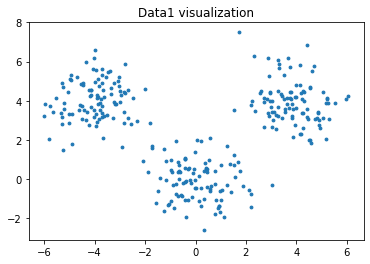

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading the data
kmc = pd.read_excel('kmc.xlsx',sheet_name = "Data1",header = None)
# visualization
plt.figure()
plt.scatter(kmc.iloc[:,0],kmc.iloc[:,1], s = 8)
plt.title("Data1 visualization")
# plt.grid()
plt.show()


**(1b) Implement K-means clustering. **

**(1c) Let $K = 3$ and the initial cluster means be $[0,0], [4,4]$ and $[-4,4]$. Plot the final clusters with K-means clustering.**

Final cluster centers :
[[ 0.06588589 -0.07250832]
 [ 3.83814758  3.94217913]
 [-3.99090257  4.03253516]]


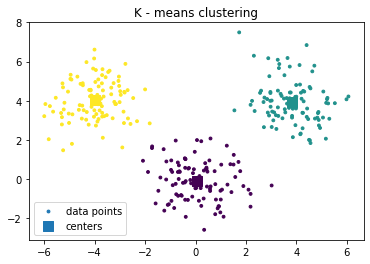

In [14]:
# implementing k = 3 clusters
kmc = np.array(kmc)
k = 3
# initialization
cluster_centres = np.array([[0,0],[4,4],[-4,4]])
iteration = 0
# np.linalg.norm(cluster_centres,cluster_centre_update)<1e-2
cluster_centre_update = np.zeros(cluster_centres.shape)
while(iteration < 10):
    # distances
    init_dist = np.zeros((len(kmc),cluster_centres.shape[0]))
    for i in range(k) :
        init_dist[:,i] = np.linalg.norm(kmc-cluster_centres[i],axis = 1)
    # classification into clusters
    clusters = np.argmin(init_dist,axis=1)
    # Re-estimating the cluster centers
    for j in range(k):
        cluster_centre_update[j] = np.mean(kmc[clusters==j],axis = 0)
    cluster_centres = cluster_centre_update
    # updating the iterations
    iteration += 1

# final cluster centers
print("Final cluster centers :")
print(cluster_centre_update)

plt.figure()
plt.scatter(kmc[:,0],kmc[:,1], c = clusters, s = 8)
plt.scatter(cluster_centre_update[:,0],cluster_centre_update[:,1], c = np.unique(clusters),marker = 's', s = 100)
plt.title("K - means clustering")
plt.legend(labels = ['data points', 'centers'] )
plt.show()

**(1d) Compute the sum of square distance of each point from the cluster mean.**

In [29]:
# sum of square distance of each point from the cluster mean
ssd = np.sum((kmc - np.mean(kmc ,axis = 0))**2)
    
print("Sum of square distance of each point from the cluster mean for, k = 1 : ",ssd)

Sum of square distance of each point from the cluster mean for, k = 1 :  4765.409075795471


**(1e) Repeat the above exercise for all $K = 2,3,4$. **

**(1f) Plot the final clusters (for $K = 2,3,4$) and report the sum of square distance of each point from the cluster mean. Comment.**

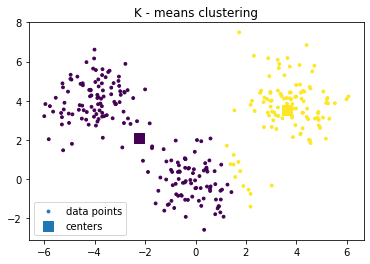

Sum of square distance of each point from the cluster mean for, k = 2 clusters :  2219.6719715910976


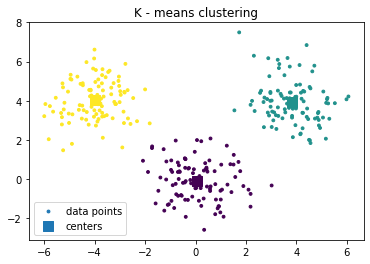

Sum of square distance of each point from the cluster mean for, k = 3 clusters :  589.9093182547097


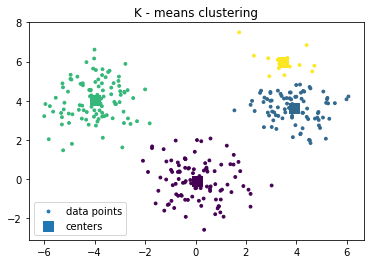

Sum of square distance of each point from the cluster mean for, k = 4 clusters :  518.3972606510929


In [26]:
# implementing k = 3 clusters
kmc = np.array(kmc)
k_values = [2,3,4]
for k in k_values:
    # initialization
    initialization = np.array([[0,0],[4,4],[-4,4],[5,8]])
    cluster_centres = initialization[:k]
    iteration = 0
    # np.linalg.norm(cluster_centres,cluster_centre_update)<1e-2
    cluster_centre_update = np.zeros(cluster_centres.shape)
    while(iteration < 10):
        # distances
        init_dist = np.zeros((len(kmc),cluster_centres.shape[0]))
        for i in range(k) :
            init_dist[:,i] = np.linalg.norm(kmc-cluster_centres[i],axis = 1)
        # classification into clusters
        clusters = np.argmin(init_dist,axis=1)
        # Re-estimating the cluster centers
        for j in range(k):
            cluster_centre_update[j] = np.mean(kmc[clusters==j],axis = 0)
        cluster_centres = cluster_centre_update
        # updating the iterations
        iteration += 1

#     # final cluster centers
#     print("Final cluster centers :")
#     print(cluster_centre_update)

    plt.figure()
    plt.scatter(kmc[:,0],kmc[:,1], c = clusters, s = 8)
    plt.scatter(cluster_centre_update[:,0],cluster_centre_update[:,1], c = np.unique(clusters),marker = 's', s = 100)
    plt.title("K - means clustering")
    plt.legend(labels = ['data points', 'centers'] )
    plt.show()
    
    # sum of square distance of each point from the cluster mean
    ssd = 0
    for i in range(k):
        ssd += np.sum((kmc[clusters == i] - cluster_centre_update[i])**2)

    print("Sum of square distance of each point from the cluster mean for, k = "+str(k)+" clusters : ",ssd)

# Observation :

- There is a huge decrease in Sum of square distance of each point from the cluster mean, from k = 2 to k = 3 clusters, but this decrease is less, when we move from k = 3 to k = 4.
- Hence we can say that k = 3 is the right number of clusters.

**(2a) Load the data from the file 'kmc-data2.xlsx' and visualize the data. **

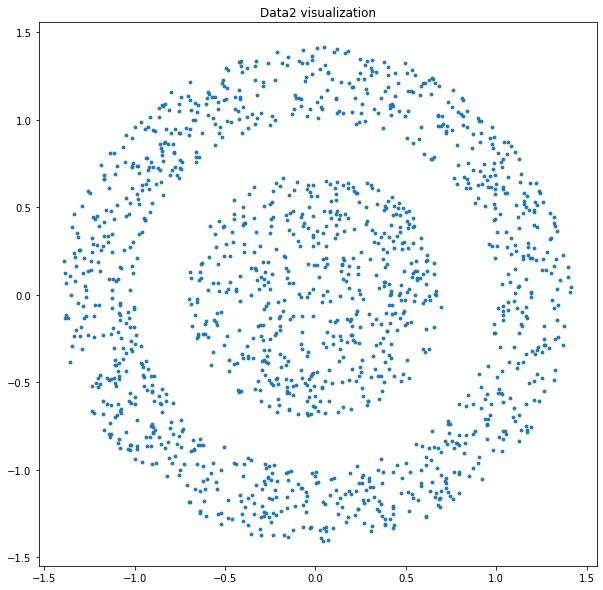

In [31]:
# loading the data
kmc = pd.read_excel('kmc.xlsx',sheet_name = "Data2")
# visualization
plt.figure(figsize=(10,10))
plt.scatter(kmc.iloc[:,0],kmc.iloc[:,1], s = 8)
plt.title("Data2 visualization")
# plt.grid()
plt.show()


**(2b) Cluster the data with K-means clustering. Consider $K = 2$. **

Final cluster centers :
[[-0.26196879 -0.59641419]
 [ 0.22935356  0.56935461]]


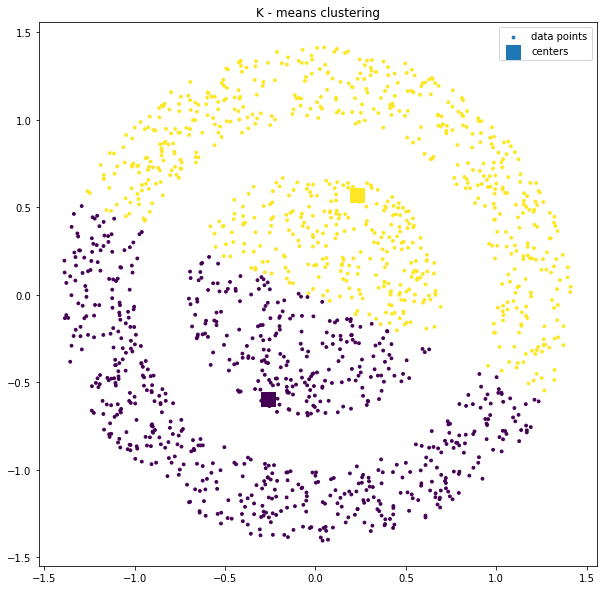

In [32]:
# implementing k = 2 clusters
k = 2
# initialization
cluster_centres = np.array([[0,0],[1,1]])
iteration = 0
# np.linalg.norm(cluster_centres,cluster_centre_update)<1e-2
cluster_centre_update = np.zeros(cluster_centres.shape)
while(iteration < 100):
    # distances
    init_dist = np.zeros((len(kmc),cluster_centres.shape[0]))
    for i in range(k) :
        init_dist[:,i] = np.linalg.norm(kmc-cluster_centres[i],axis = 1)
    # classification into clusters
    clusters = np.argmin(init_dist,axis=1)
    # Re-estimating the cluster centers
    for j in range(k):
        cluster_centre_update[j] = np.mean(kmc[clusters==j],axis = 0)
    cluster_centres = cluster_centre_update
    # updating the iterations
    iteration += 1

# final cluster centers
print("Final cluster centers :")
print(cluster_centre_update)
# print(kmc)
plt.figure(figsize=(10,10))
plt.scatter(kmc.iloc[:,0],kmc.iloc[:,1], c = clusters, s = 8)
plt.scatter(cluster_centre_update[:,0],cluster_centre_update[:,1], c = np.unique(clusters),marker = 's', s = 200)
plt.title("K - means clustering")
plt.legend(labels = ['data points', 'centers'] )
plt.show()

**(2c) Suppose you want to cluster the data into two rings. Now, transform the data such that K-means clustering identifies the two rings as clusters. **

Final cluster centers after doing radial transformation :
[[0.48460955]
 [1.21416066]]


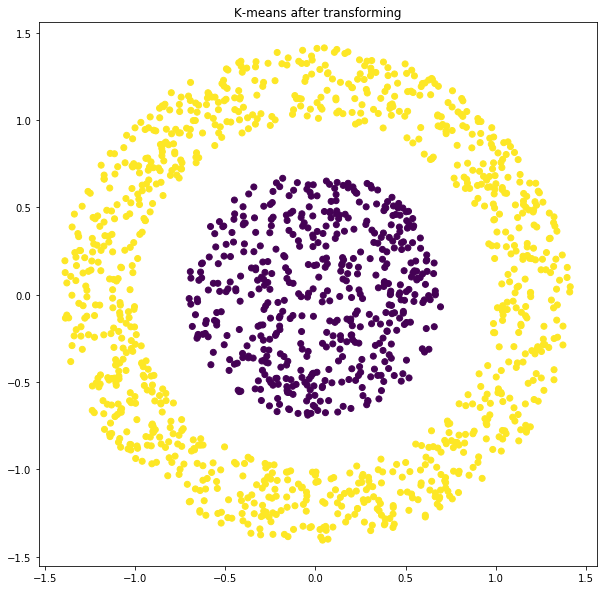

In [33]:
# transforming into distances from origin
kmc = np.array(kmc)
kmc_tr = np.linalg.norm(kmc,axis = 1)
kmc_tr = kmc_tr.reshape(-1,1)
k = 2
# initialization
cluster_centres = np.array([0,1]).reshape(-1,1)
iteration = 0
# np.linalg.norm(cluster_centres,cluster_centre_update)<1e-2
cluster_centre_update = np.zeros(cluster_centres.shape)
while(iteration < 100):
    # distances
    init_dist = np.zeros((len(kmc),cluster_centres.shape[0]))
    for i in range(k) :
        init_dist[:,i] = np.linalg.norm(kmc_tr-cluster_centres[i],axis = 1)
    # classification into clusters
    clusters = np.argmin(init_dist,axis=1)
    # Re-estimating the cluster centers
    for j in range(k):
        cluster_centre_update[j] = np.mean(kmc_tr[clusters==j],axis = 0)
    cluster_centres = cluster_centre_update
    # updating the iterations
    iteration += 1

# final cluster centers
print("Final cluster centers after doing radial transformation :")
print(cluster_centre_update)

plt.figure(figsize=(10,10))
plt.scatter(kmc[:,0],kmc[:,1],c = clusters)
plt.title("K-means after transforming")
plt.show()

**(3a) (Optional) Consider the data in 'kmc-data1.xlsx'. Now, approximate the distribution of the data with a mixture of Gaussians, one per cluster. Report the distribution. **

**(3b) (Optional) Sample points from the mixture distribution and see if the points lie in the same cluster (distribution) from which it was generated. **